In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/home/daniel/testbig.csv")
id_map = {
    0: "cmpt",
    1: "lpf prun",
    2: "lpf theo",
    3: "lpf heu",
    4: "fp prun",
    5: "fp theo",
}
df['id'] = df["id"].replace(id_map)
df['bpS'] = df.apply(lambda row: row.treesize/ row.textsize * 8 , axis=1)
print(df.head())

         id      text_id  textsize  treesize  constr_time  peak_mem  \
0      cmpt  ./data/cere  33554432   5819447       150939  15120976   
1  lpf prun  ./data/cere  33554432   7363615        14278  14289519   
2  lpf theo  ./data/cere  33554432  16557218        11249  19706450   
3   lpf heu  ./data/cere  33554432   7303801        11343  14171145   
4   fp prun  ./data/cere  33554432   6019335       113629  11592719   

   access_avg  s  t  l       bpS  
0     670.924  1  2  2  1.387464  
1     204.741  z  2  2  1.755623  
2     163.709  z  2  2  3.947548  
3     210.022  z  2  2  1.741362  
4     733.028  1  2  2  1.435121  


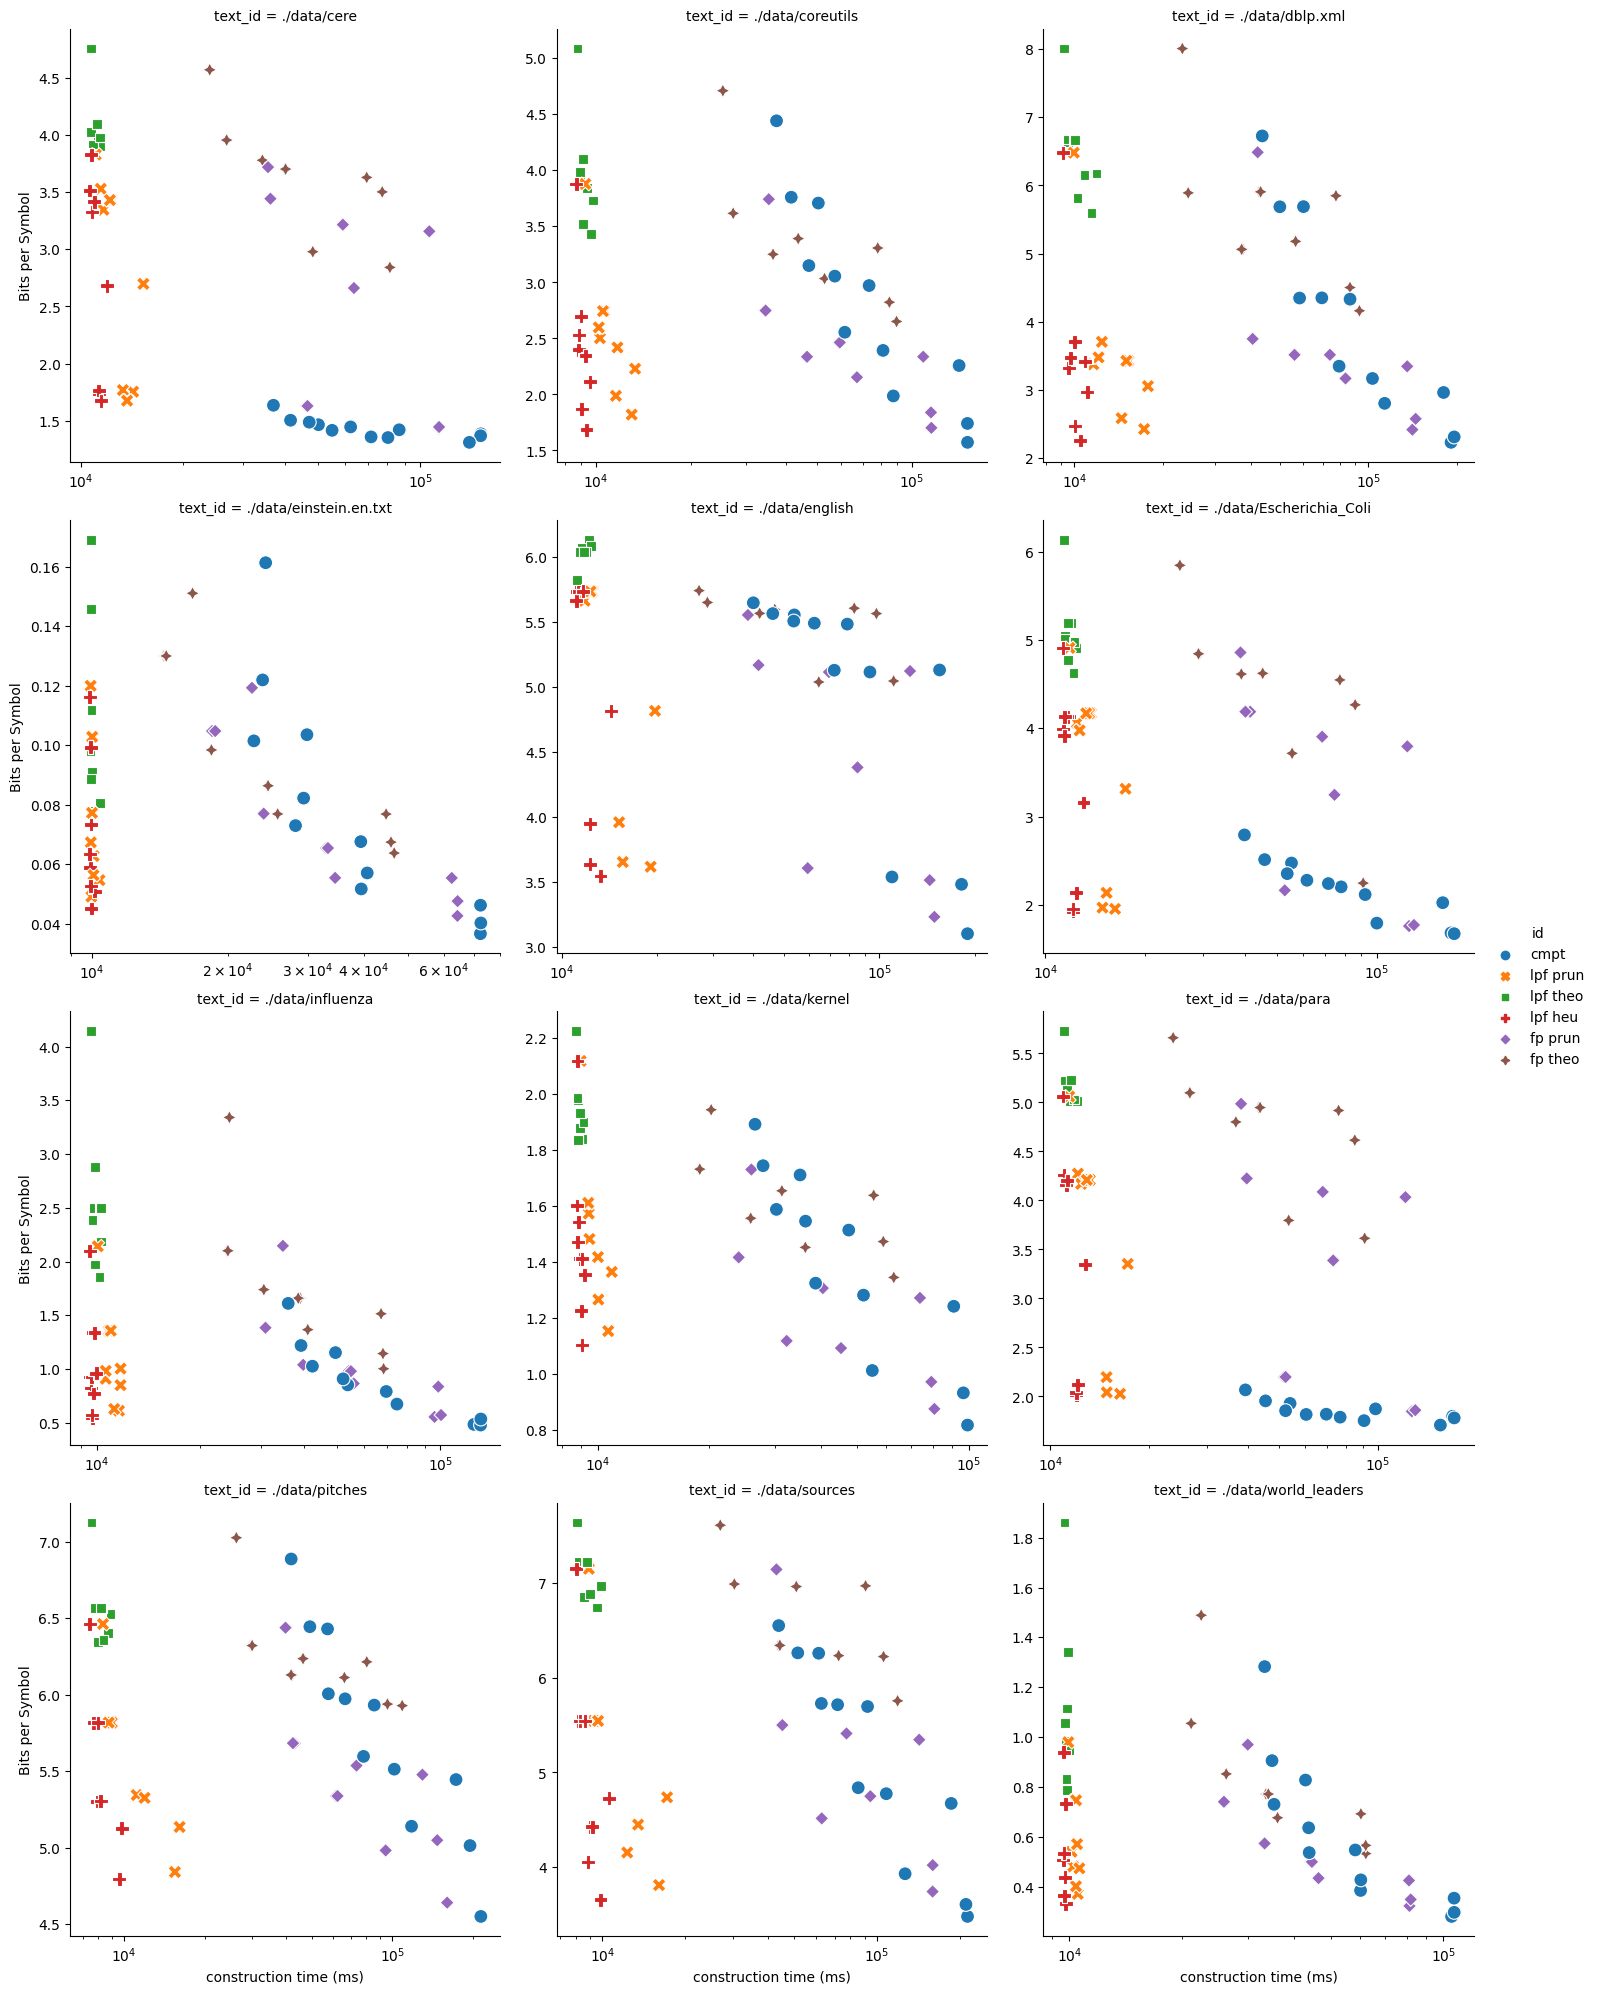

In [8]:
speed_size_log = sns.relplot(x='constr_time', y='bpS', data=df, col='text_id',
                         col_wrap=3, hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size_log.set_ylabels('Bits per Symbol')
speed_size_log.set_xlabels('construction time (ms)')
speed_size_log.set(xscale="log")

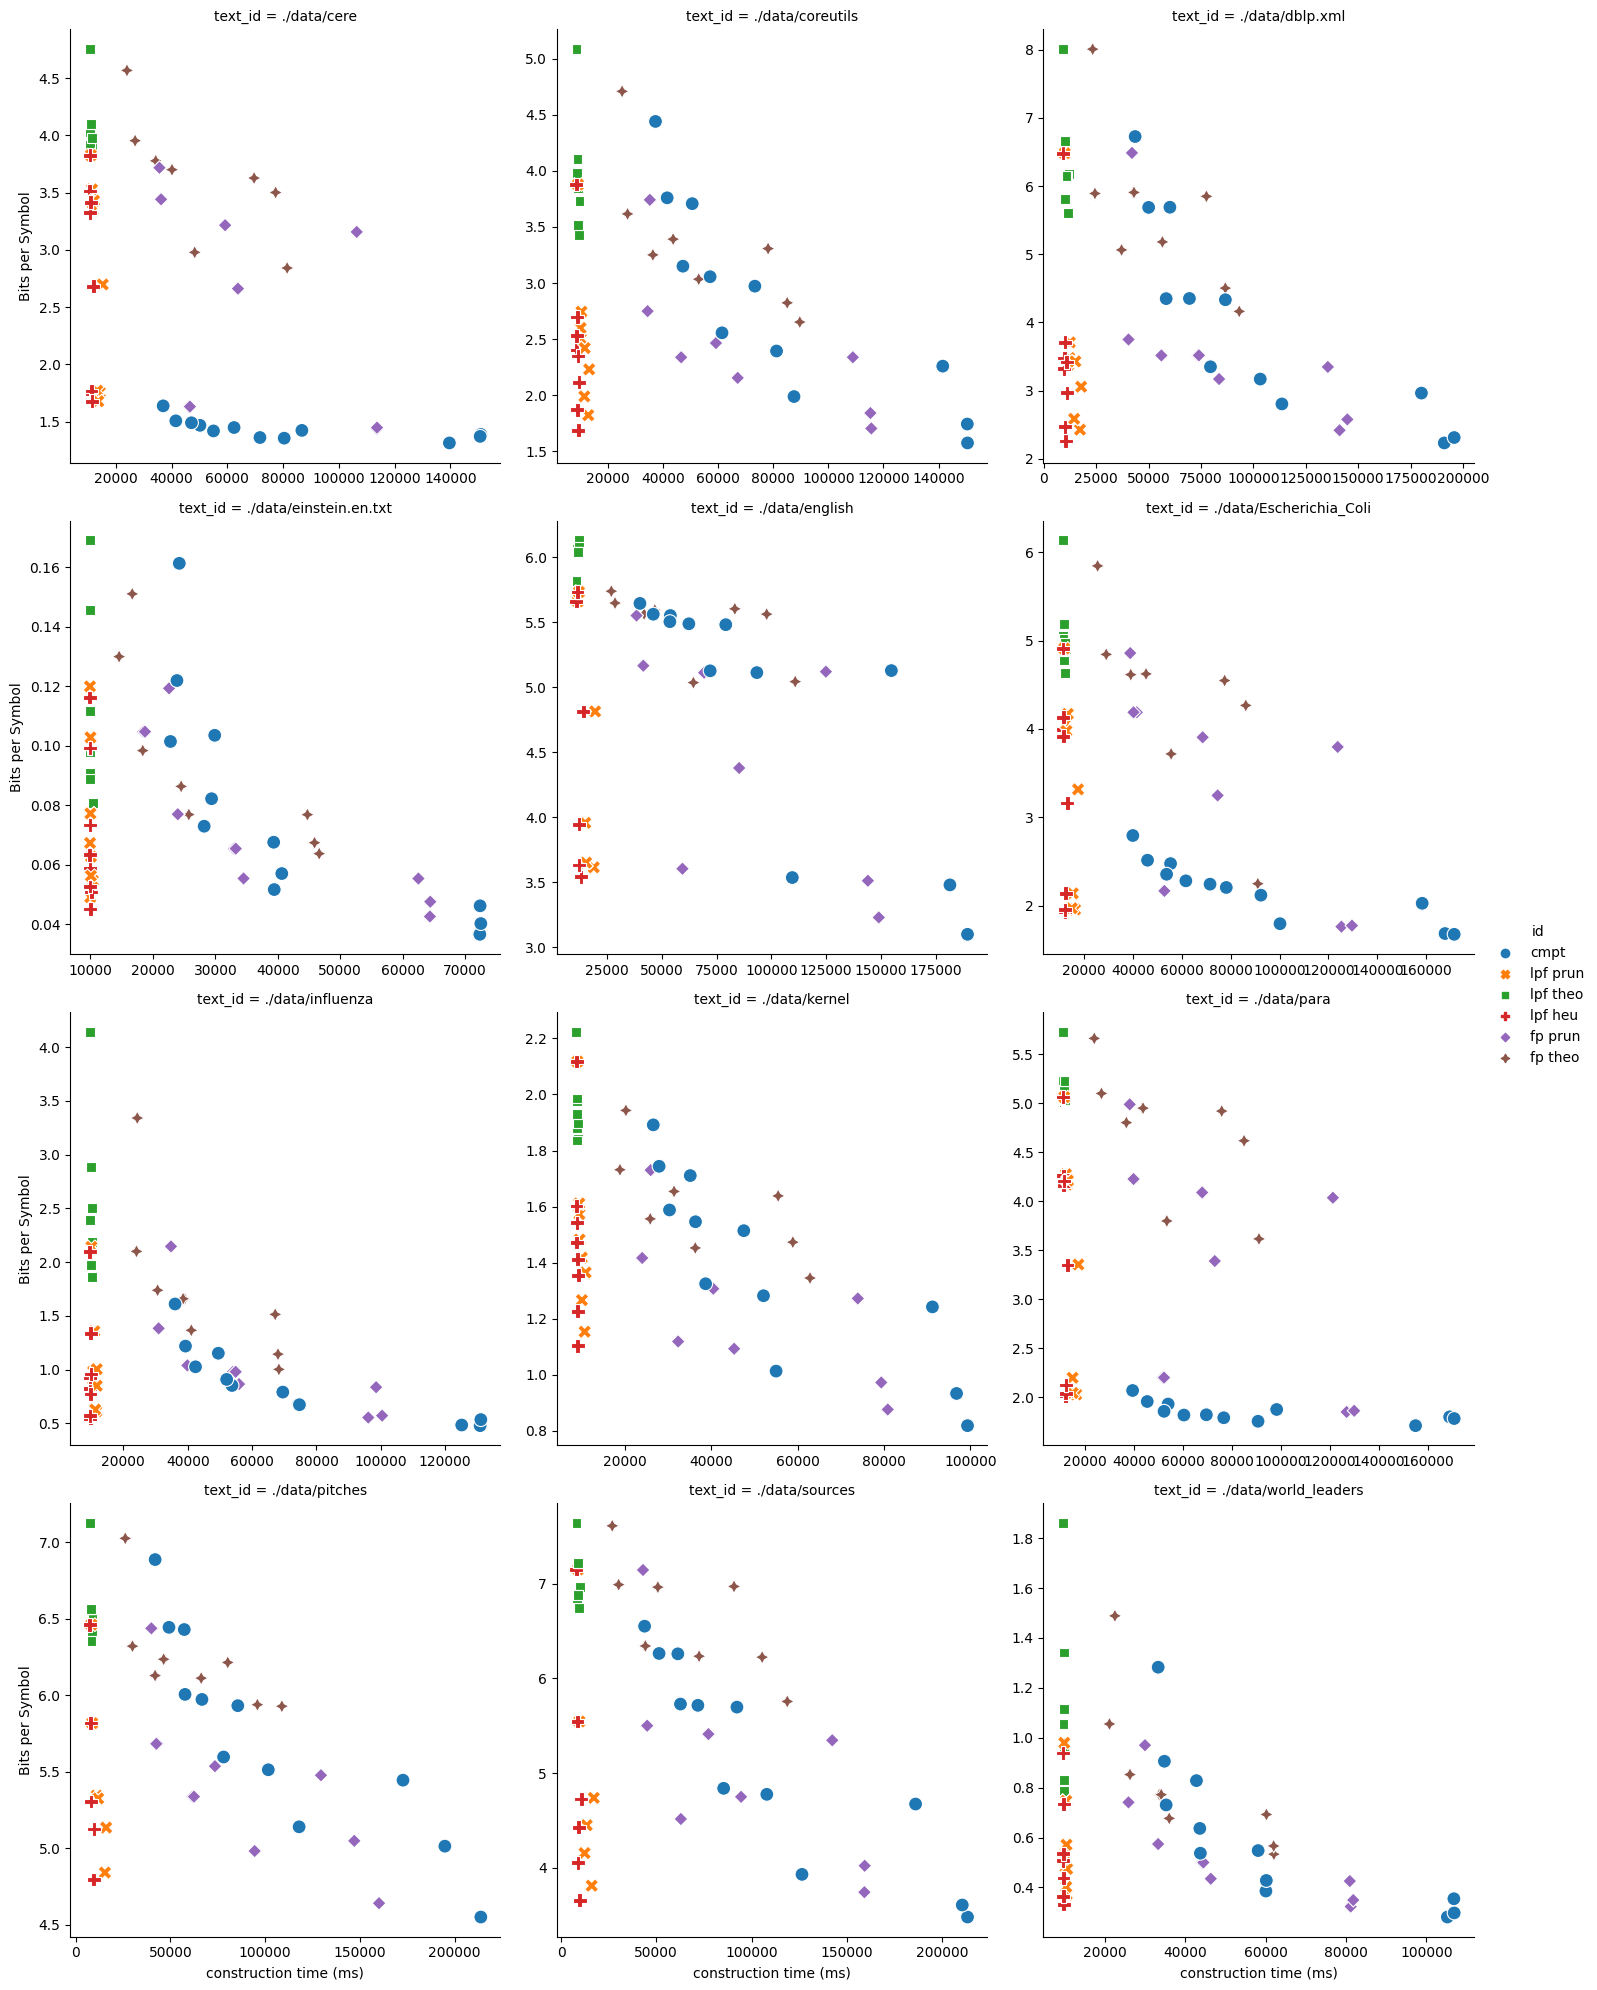

In [9]:
speed_size = sns.relplot(x='constr_time', y='bpS', data=df, col='text_id',
    col_wrap=3, hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
speed_size.set_ylabels('Bits per Symbol')
speed_size.set_xlabels('construction time (ms)')


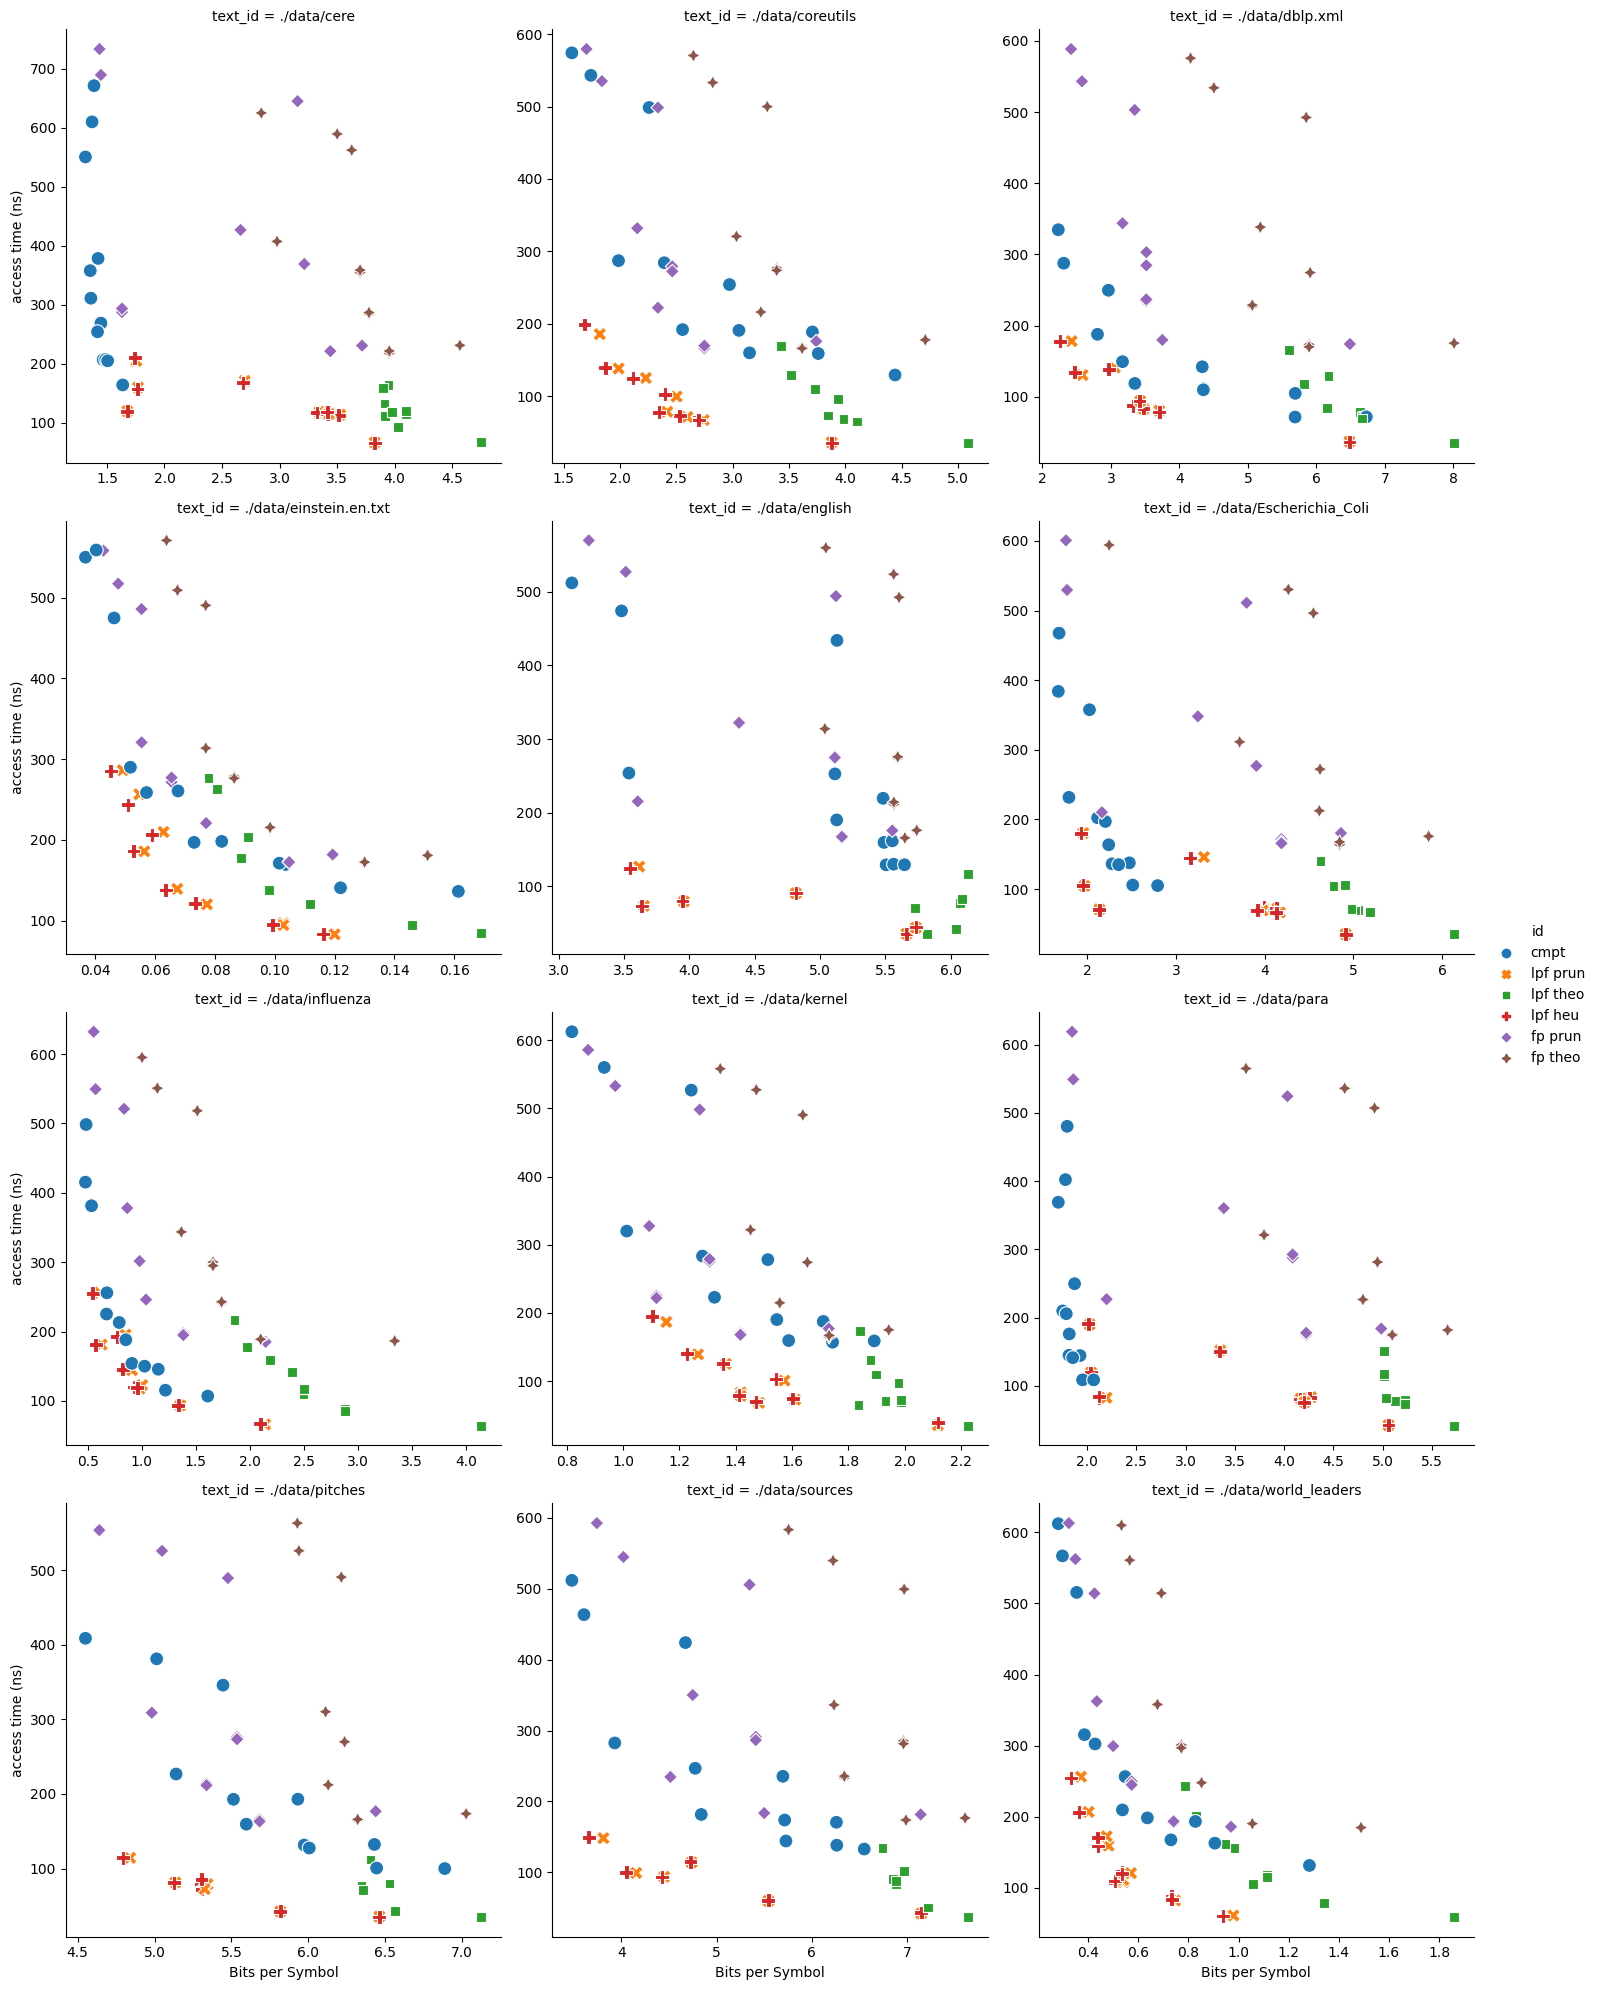

In [10]:
que_size = sns.relplot(x='bpS', y='access_avg', data=df, col='text_id', col_wrap=3, hue="id",
                       style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
que_size.set_ylabels('access time (ns)')
que_size.set_xlabels('Bits per Symbol')

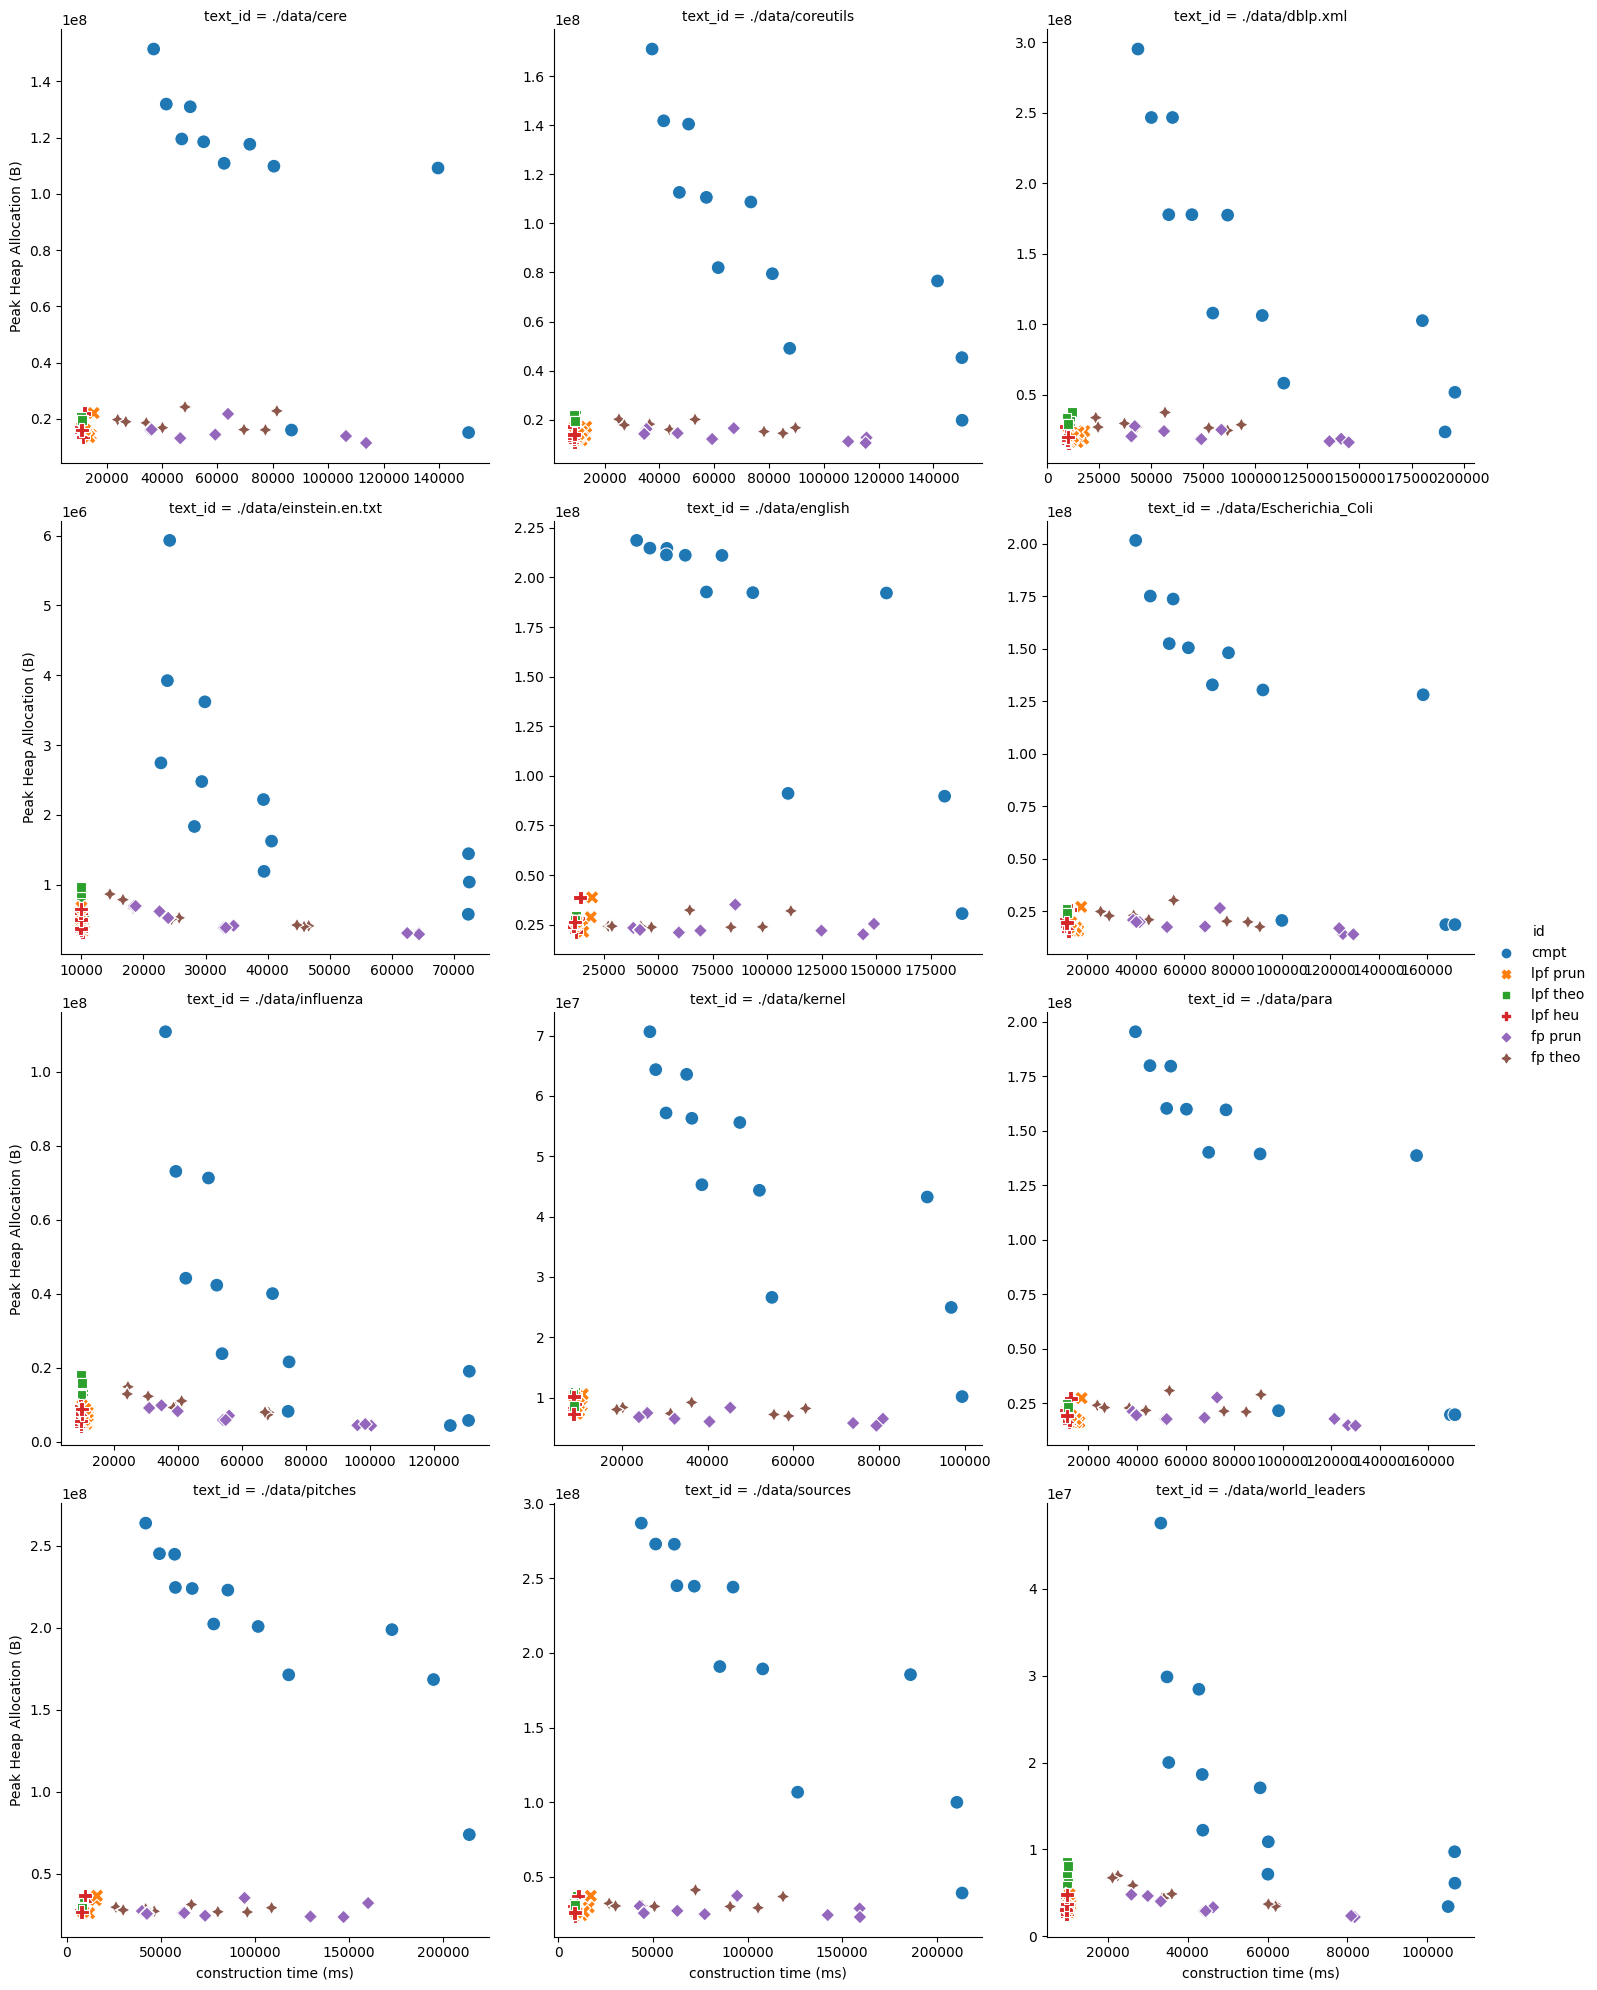

In [11]:

size_size = sns.relplot(x='constr_time', y='peak_mem', data=df, col='text_id', col_wrap=3,
                        hue="id", style="id", s=100,facet_kws={'sharey': False, 'sharex': False})
size_size.set_ylabels('Peak Heap Allocation (B)')
size_size.set_xlabels('construction time (ms)')
